## Communities and sparse networks

Recently, I've started working under the assumption that the network is fairly sparse. I've read a lot of reports, and I don't really believe that injectors are sharing their equipment all that frequently, and with that many people.

Intuitively this makes sense, people know sharing equipment is a risky behaviour.

Common causes of sharing injection equipment:
* Withdrawal
* Sexual Partner with another injector
* Confiscation of injection equipment

In [69]:
import sys
sys.path.append('..')
from NetworkEpidemicSimulation.Simulation import complex_epidemic_simulation
from NetworkEpidemicSimulation.DynamicNetworks import dynamic_stochastic_block_model
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

# Universal Parameters

In [70]:
beta = 0.00031
infection_period = 1000
network_connectedness = 1
community_connectedness = 5

In [18]:
number_of_communities = 100
community_size = 10
N = number_of_communities * community_size


sizes = [community_size for x in range(number_of_communities)]

p = [[network_connectedness/(N-community_size) for x in range(number_of_communities)] for y in range(number_of_communities)]

for i in range(number_of_communities):
    p[i][i] = community_connectedness/(community_size-1)

G = nx.generators.community.stochastic_block_model(sizes, p)

In [20]:
#my_network_model = dynamic_stochastic_block_model(sizes, p, m, waiting_time_par= 10, end_time = 1500)

my_network_epidemic = complex_epidemic_simulation(G,        # The network we defined earlier
                                                  beta = beta,             # Nodes emit hazard at a rate of 0.05 per day (constant rate, but can be changed)
                                                  infection_period_parameters = infection_period,       # The length of an infection is distributed exponentially
                                                  initial_infected = 321,  # 100 nodes are initially infected at time = 0
                                                  time_increment = 0.5,    # Time is incremented in half a unit of time
                                                  max_iterations = 5000,   # 3000 increments are performed, so time = 1500 at the end.
                                                  SIS = True)              # The epidemic is of type SIS

In [21]:
my_network_epidemic.iterate_epidemic()

A ballpark estimate for the prevalence of HCV in PWID is 32.1% in Greater Manchester.

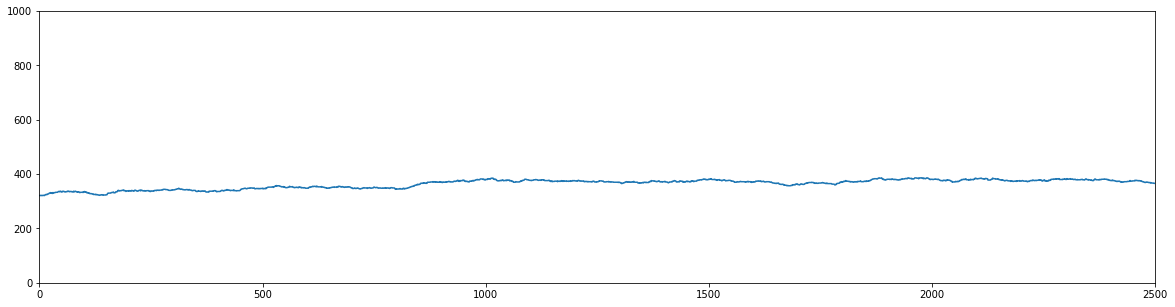

In [22]:
plt.rcParams['figure.figsize'] = [20, 5]

plt.ylim((0,N))
plt.xlim((0,2500))
plt.plot(my_network_epidemic.data_time, my_network_epidemic.data_infected_counts)

In [23]:
np.mean(my_network_epidemic.data_infected_counts[1000:])/N

0.3704893776555861

# Network 2
* number_of_communities = 50
* community_size = 20

In [61]:
number_of_communities = 50
community_size = 20
N = number_of_communities * community_size
network_connectedness = 1
community_connectedness = 5

sizes = [community_size for x in range(number_of_communities)]

p = [[network_connectedness/(N-community_size) for x in range(number_of_communities)] for y in range(number_of_communities)]

for i in range(number_of_communities):
    p[i][i] = community_connectedness/(community_size-1)

G = nx.generators.community.stochastic_block_model(sizes, p)

In [56]:
np.mean([node[1] for node in G.degree()])

5.966

In [57]:
#my_network_model = dynamic_stochastic_block_model(sizes, p, m, waiting_time_par= 10, end_time = 1500)

my_network_epidemic = complex_epidemic_simulation(G,        # The network we defined earlier
                                                  beta = beta,             # Nodes emit hazard at a rate of 0.05 per day (constant rate, but can be changed)
                                                  infection_period_parameters = infection_period,       # The length of an infection is distributed exponentially
                                                  initial_infected = 321,  # 100 nodes are initially infected at time = 0
                                                  time_increment = 0.5,    # Time is incremented in half a unit of time
                                                  max_iterations = 5000,   # 3000 increments are performed, so time = 1500 at the end.
                                                  SIS = True)              # The epidemic is of type SIS

In [58]:
my_network_epidemic.iterate_epidemic()

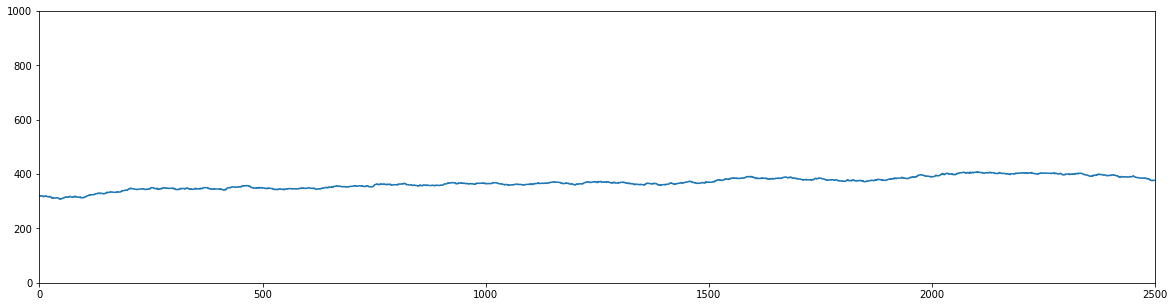

In [59]:
plt.rcParams['figure.figsize'] = [20, 5]

plt.ylim((0,N))
plt.xlim((0,2500))
plt.plot(my_network_epidemic.data_time, my_network_epidemic.data_infected_counts)

In [60]:
np.mean(my_network_epidemic.data_infected_counts[1000:])/N

0.375670832291927

# Network 3
* number_of_communities = 10
* community_size = 100

In [62]:
number_of_communities = 10
community_size = 100
N = number_of_communities * community_size
network_connectedness = 1
community_connectedness = 5

sizes = [community_size for x in range(number_of_communities)]

p = [[network_connectedness/(N-community_size) for x in range(number_of_communities)] for y in range(number_of_communities)]

for i in range(number_of_communities):
    p[i][i] = community_connectedness/(community_size-1)

G = nx.generators.community.stochastic_block_model(sizes, p)

In [63]:
np.mean([node[1] for node in G.degree()])

6.138

In [64]:
#my_network_model = dynamic_stochastic_block_model(sizes, p, m, waiting_time_par= 10, end_time = 1500)

my_network_epidemic = complex_epidemic_simulation(G,        # The network we defined earlier
                                                  beta = beta,             # Nodes emit hazard at a rate of 0.05 per day (constant rate, but can be changed)
                                                  infection_period_parameters = infection_period,       # The length of an infection is distributed exponentially
                                                  initial_infected = 321,  # 100 nodes are initially infected at time = 0
                                                  time_increment = 0.5,    # Time is incremented in half a unit of time
                                                  max_iterations = 5000,   # 3000 increments are performed, so time = 1500 at the end.
                                                  SIS = True)              # The epidemic is of type SIS

In [65]:
my_network_epidemic.iterate_epidemic()

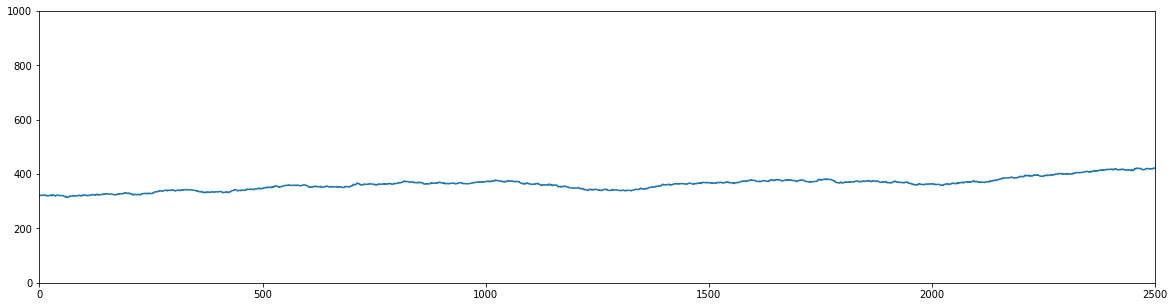

In [47]:
plt.rcParams['figure.figsize'] = [20, 5]

plt.ylim((0,N))
plt.xlim((0,2500))
plt.plot(my_network_epidemic.data_time, my_network_epidemic.data_infected_counts)

In [48]:
np.mean(my_network_epidemic.data_infected_counts[1000:])/N

0.3710167458135466